<h1>How well do jobs and skills pay for Data Analysts?</h1>

<h3>Methology</h3>

1.Evaluate median salary for top 6 data jobs

2.Find median salary per skill for Data Analysts

3.Visualize for highest paying skills and most demanded skills

<h3>Importing Libraries and Data</h3>

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

from datasets import load_dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleanup

import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_type_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

<h3>Salary Distribution by Job Title</h3>

In [2]:
# filter for the job titles and country
df_Ind = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in the dataset and filter the dataframe to only contain these job titles.

In [3]:
job_titles = df_Ind['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_Ind_top6 = df_Ind[df_Ind['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_Ind_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles


['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

<h3>Plotting Salary Distributions</h3>

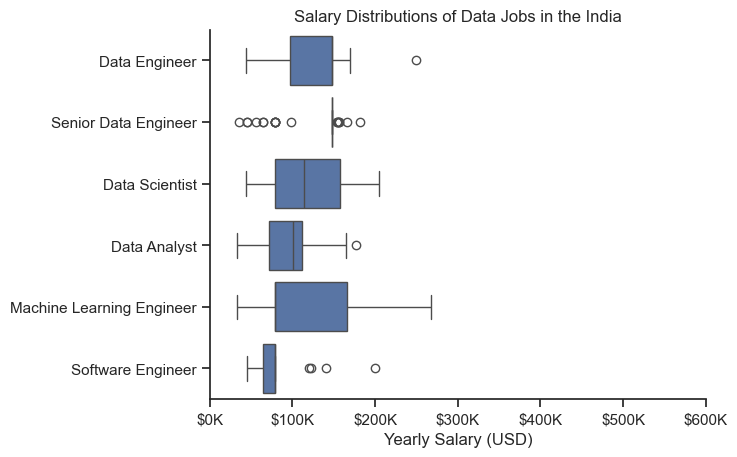

In [5]:
sns.boxplot(data=df_Ind_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()


plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

<h3>Investigate Median Salary Vs Skill for Data Analysts</h3>

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'India', to create a new DataFrame df_DA_Ind. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.


In [6]:
# Only get data analyst jobs in the US
df_DA_Ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_Ind = df_DA_Ind.dropna(subset=['salary_year_avg'])

df_DA_Ind = df_DA_Ind.explode('job_skills')

df_DA_Ind[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,"['python', 'sql', 'aws', 'azure', 'excel', 'je..."
27487,165000.0,"['mongo', 'sql', 'python', 'mongodb', 'mongodb..."
29583,119250.0,"['sql', 'visio', 'excel', 'jira', 'confluence']"
32890,105000.0,"['sql', 'swift', 'tableau', 'git']"
41257,57500.0,"['sql', 'alteryx']"


<h3>Determine The Highest Paid Skills and Most Demanded Skills</h3>

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_Ind. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [7]:
df_DA_top_pay = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
"['python', 'nosql', 'sql', 'scala', 'shell', 'databricks', 'snowflake', 'aws', 'oracle', 'spark', 'kafka', 'pyspark', 'pandas', 'airflow', 'linux', 'unix', 'power bi', 'flow', 'jenkins', 'gitlab']",1,165000.0
"['oracle', 'sap']",1,165000.0
"['mongo', 'sql', 'python', 'mongodb', 'mongodb', 'sql server', 'mysql', 'postgresql', 'azure', 'aws', 'redshift', 'oracle', 'spark', 'hadoop', 'power bi']",1,165000.0
"['sql', 'no-sql', 'mongodb', 'mongodb', 'python', 'scala', 'go', 'neo4j', 'azure', 'aws', 'oracle', 'databricks', 'gdpr', 'hadoop', 'spark', 'power bi']",1,163782.0
['gdpr'],1,163782.0
"['sql', 'visio', 'excel', 'jira', 'confluence']",1,119250.0
"['sql', 'azure', 'power bi', 'excel', 'flow']",1,118140.0
"['sql', 'python', 'r', 'spark', 'express', 'excel', 'looker', 'powerpoint']",2,111188.5
"['go', 'sql', 'python', 'tableau', 'powerpoint', 'excel', 'outlook', 'jira', 'slack']",1,111175.0


Calculates the count and median salary for each skill in df_DA_Ind. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [8]:
df_DA_skills = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
"['sql', 'no-sql', 'mongodb', 'mongodb', 'python', 'scala', 'go', 'neo4j', 'azure', 'aws', 'oracle', 'databricks', 'gdpr', 'hadoop', 'spark', 'power bi']",1,163782.0
"['sql', 'python', 'r', 'spark', 'express', 'excel', 'looker', 'powerpoint']",2,111188.5
['python'],2,111175.0
"['python', 'r', 'bash', 'azure', 'spark', 'pandas']",2,111175.0
"['sql', 'power bi', 'dax']",1,111175.0
"['sql', 'python']",2,87987.5
"['sql', 'sql server', 'oracle', 'azure', 'ssis']",2,72000.0
"['sql', 'python', 'r', 'excel']",3,64800.0
"['excel', 'word']",2,57600.0


Creating two horizontal bar charts:

1.Displays the highest paid skills

2.Shows the most in demand skills

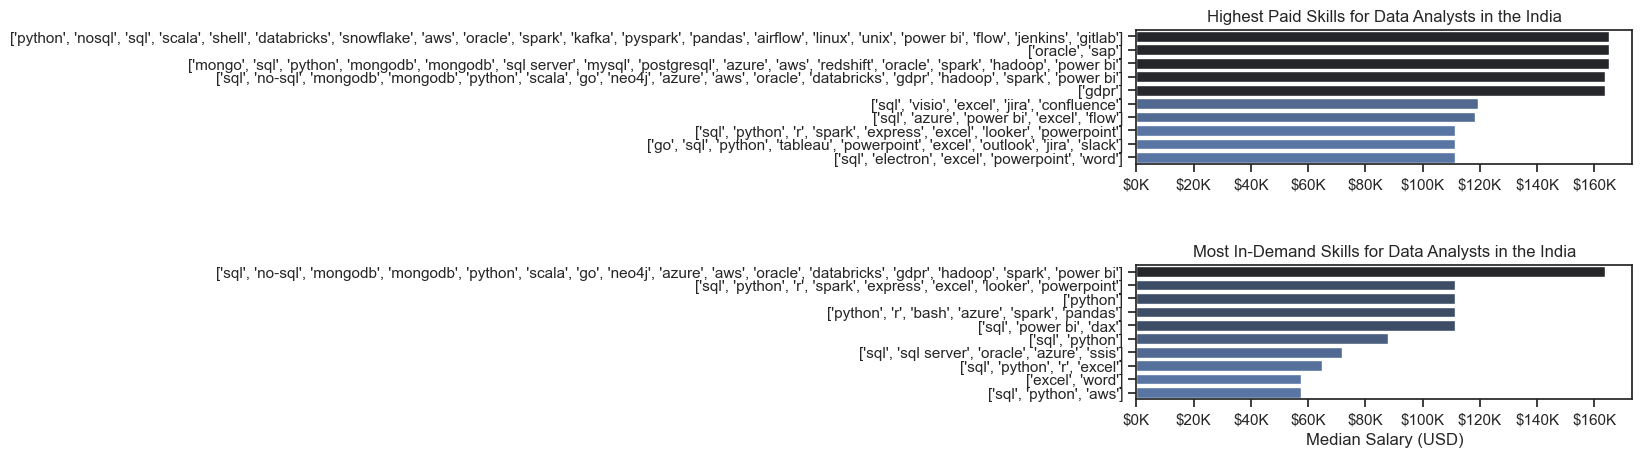

In [12]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.subplots_adjust(hspace=0.75)

plt.show()